In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
#from imutils.video import VideoStream

import numpy as np
#import imutils
import time
import cv2
import os
#from imutils import paths
import matplotlib.pyplot as plt

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
data_dir = 'dataset'
train_dir = os.path.join(data_dir, 'Train')
validation_dir = os.path.join(data_dir, 'Validation')

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, horizontal_flip=True, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 624 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


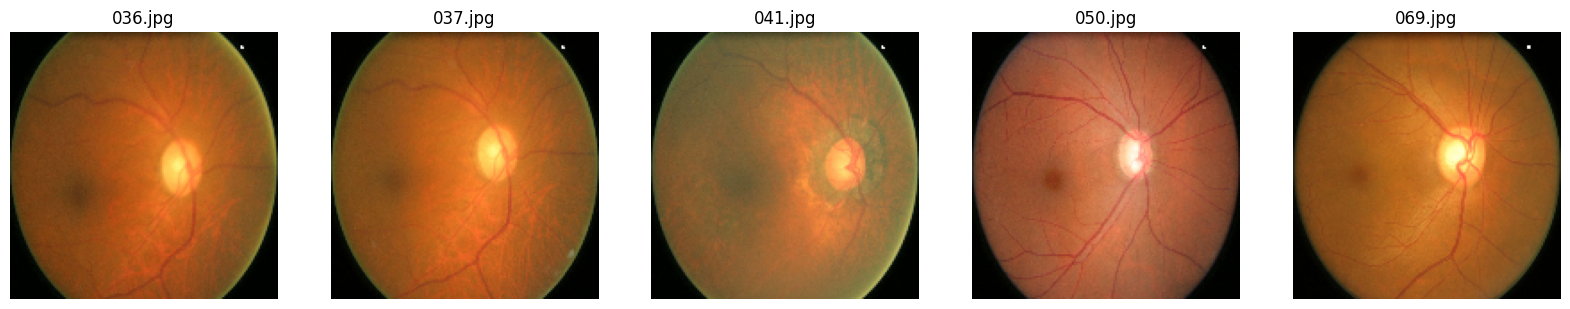

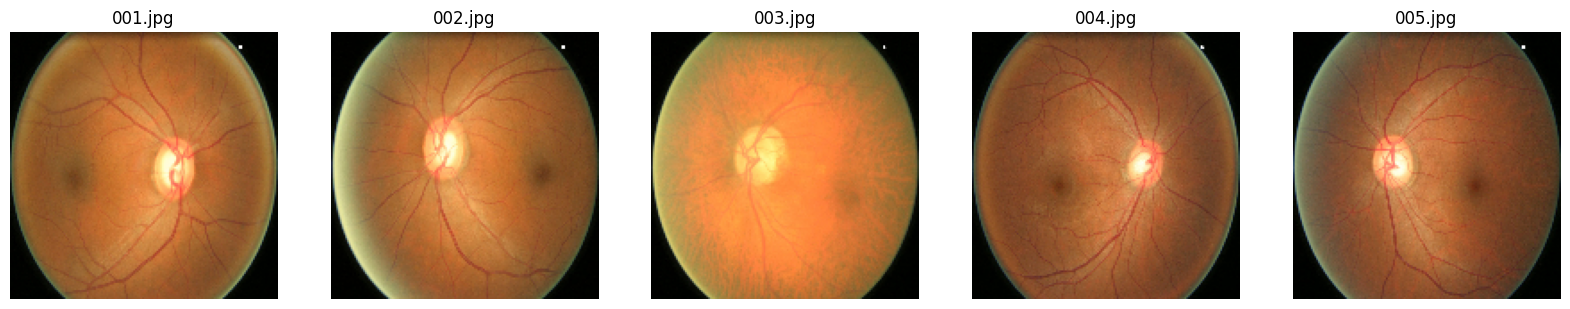

In [13]:
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to display images
def display_images(directory, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    image_files = os.listdir(directory)[:num_images]
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(directory, img_file)
        image = load_img(img_path, target_size=(150, 150))
        image_array = img_to_array(image)
        axes[i].imshow(image_array.astype('uint8'))
        axes[i].axis('off')
        axes[i].set_title(img_file)
    plt.show()

# Display images from Glaucoma_Positive folder in train_dir
train_glaucoma_positive_dir = os.path.join(train_dir, 'Glaucoma_Positive')
display_images(train_glaucoma_positive_dir)


# Display images from Glaucoma_Negative folder in train_dir
train_glaucoma_negative_dir = os.path.join(train_dir, 'Glaucoma_Negative')
display_images(train_glaucoma_negative_dir)

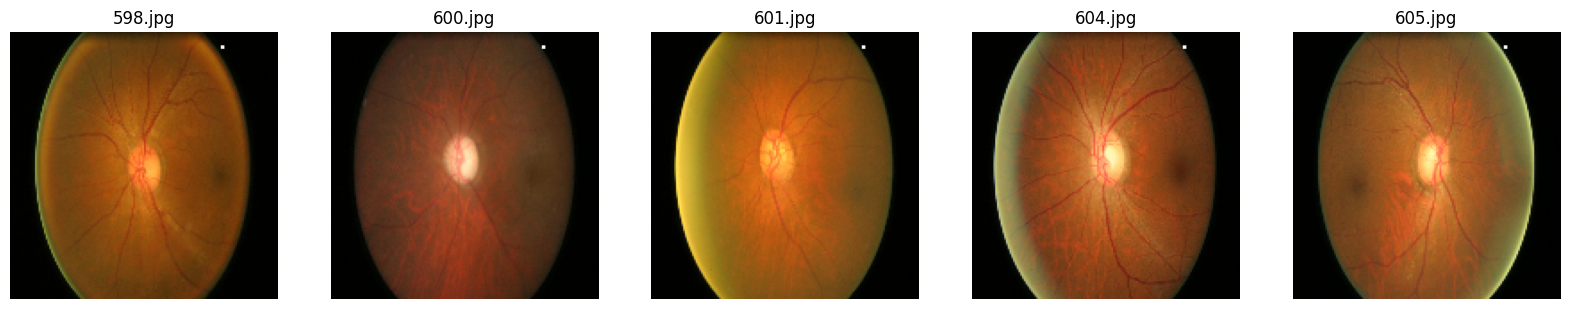

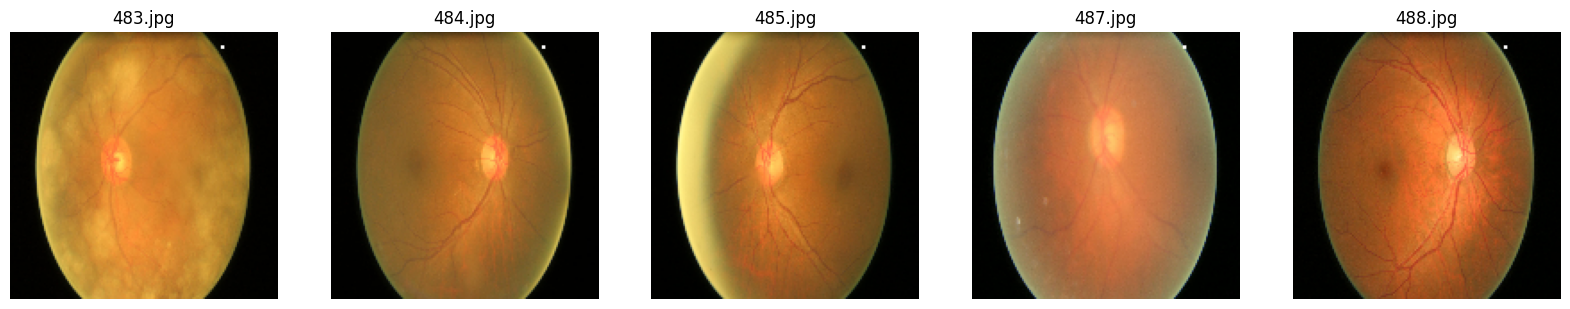

In [14]:
# Display images from Glaucoma_Positive folder in validation_dir
validation_glaucoma_positive_dir = os.path.join(validation_dir, 'Glaucoma_Positive')
display_images(validation_glaucoma_positive_dir)

# Display images from Glaucoma_Negative folder in validation_dir
validation_glaucoma_negative_dir = os.path.join(validation_dir, 'Glaucoma_Negative')
display_images(validation_glaucoma_negative_dir)
